# Overview
## Goal
Credit card fraud has been a common and serious issue nowadays, and new ways of conducting fraud have been invented, therefore, it is important to study the patterns of those fraud activities. Exploratory data analysis will be performed on transaction datasets, where general information about users and details about transactions will be provided. Finally, an unsupervised algorithm to detect fraud will be implemented.

### 1. Data Importing and Processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
info = pd.read_csv("cc_info.csv")
info.head()

,credit_card,city,state,zipcode,credit_card_limit
0,1280981422329509,Dallas,PA,18612,6000
1,9737219864179988,Houston,PA,15342,16000
2,4749889059323202,Auburn,MA,1501,14000
3,9591503562024072,Orlando,WV,26412,18000
4,2095640259001271,New York,NY,10001,20000


In [3]:
transactions = pd.read_csv("transactions.csv")
transactions.head()

,credit_card,date,transaction_dollar_amount,Long,Lat
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719


In [4]:
transactions.dtypes

credit_card                    int64
date                          object
transaction_dollar_amount    float64
Long                         float64
Lat                          float64
dtype: object

In [5]:
#check missing values, no missing entries
info.isnull().mean()

credit_card          0.0
city                 0.0
state                0.0
zipcode              0.0
credit_card_limit    0.0
dtype: float64

In [6]:
transactions.isnull().mean()

credit_card                  0.0
date                         0.0
transaction_dollar_amount    0.0
Long                         0.0
Lat                          0.0
dtype: float64

In [7]:
#check basic summary statistics
info.describe()

,credit_card,zipcode,credit_card_limit
count,9.840000e+02,984.000000,984.000000
mean,5.410432e+15,17895.316057,12321.138211
std,2.545234e+15,23778.651105,7398.449174
min,1.003715e+15,690.000000,2000.000000
25%,3.316062e+15,3280.000000,7000.000000
50%,5.365218e+15,5820.000000,10000.000000
75%,7.562153e+15,18101.250000,16000.000000
max,9.999757e+15,98401.000000,55000.000000


In [8]:
transactions.describe()

,credit_card,transaction_dollar_amount,Long,Lat
count,2.945880e+05,294588.000000,294588.000000,294588.000000
mean,5.424562e+15,86.008036,-76.235238,40.937669
std,2.555803e+15,124.655954,20.135015,5.391695
min,1.003715e+15,0.010000,-179.392887,-68.046553
25%,3.344214e+15,29.970000,-80.209708,40.487726
50%,5.353426e+15,58.470000,-73.199737,42.403066
75%,7.646245e+15,100.400000,-72.091933,43.180015
max,9.999757e+15,999.970000,179.917513,78.914330


<AxesSubplot:xlabel='transaction_dollar_amount'>

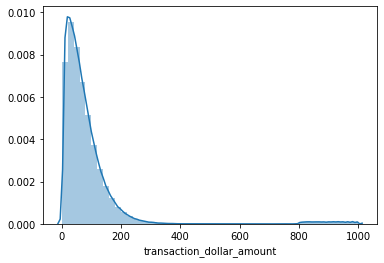

In [9]:
#amount right skewed, with several large amount transactions
sns.distplot(transactions["transaction_dollar_amount"])

In [10]:
#merge two datasets by credit card number
data = pd.merge(info, transactions, on = "credit_card",how="left")

In [11]:
data.isnull().mean() #all credit card users appear in transactions

credit_card                  0.0
city                         0.0
state                        0.0
zipcode                      0.0
credit_card_limit            0.0
date                         0.0
transaction_dollar_amount    0.0
Long                         0.0
Lat                          0.0
dtype: float64

In [12]:
#working with dates, add features of month, weekday, day, hour 
data.loc[:,"date"] = pd.to_datetime(data["date"])
data.loc[:,"month"] = data['date'].dt.month.astype(str)
data.loc[:,"day"] = data['date'].dt.day.astype(str)
data.loc[:,"weekday"] = (data['date'].dt.weekday + 1).astype(str) #Monday is 1 instead of 0
data.loc[:,"hour"] = data['date'].dt.hour.astype(str)

In [13]:
data.head()

,credit_card,city,state,zipcode,credit_card_limit,date,transaction_dollar_amount,Long,Lat,month,day,weekday,hour
0,1280981422329509,Dallas,PA,18612,6000,2015-08-05 00:59:19,11.94,-75.964527,41.353578,8,5,3,0
1,1280981422329509,Dallas,PA,18612,6000,2015-10-29 18:23:04,5.76,-76.019703,41.311467,10,29,4,18
2,1280981422329509,Dallas,PA,18612,6000,2015-10-25 17:50:48,25.84,-76.043031,41.291053,10,25,7,17
3,1280981422329509,Dallas,PA,18612,6000,2015-09-05 17:39:43,68.89,-75.944299,41.327282,9,5,6,17
4,1280981422329509,Dallas,PA,18612,6000,2015-09-04 14:12:59,27.01,-75.997259,41.352099,9,4,5,14


In [14]:
data["month"].value_counts()

8     99167
9     96026
10    95014
7      4381
Name: month, dtype: int64

### 2. EDA
We might be interested in: 
   - Which Month do most transactions occur?
   - Which weekday do most transactions occur?
   - Which hour do most transactions occur?
   - Are there significant differences in frequency of transactions among users?
   

<AxesSubplot:ylabel='month'>

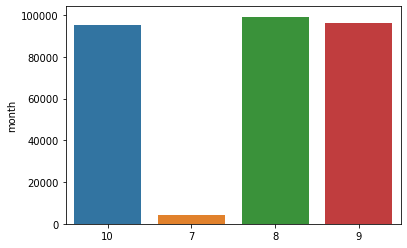

In [15]:
#number of transactions by month, there are only four months in the dataset
#8,9 and 10 have similar number of transactions, 7 has much fewer since majority of data are from 7 to 10.
sns.barplot(data["month"].value_counts().index,data["month"].value_counts())

<AxesSubplot:xlabel='month', ylabel='transaction_dollar_amount'>

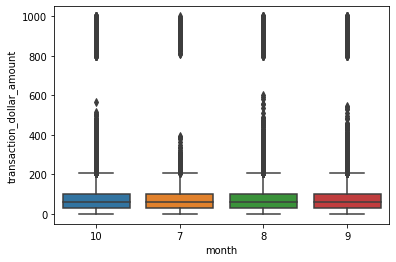

In [16]:
#Similar medians and variances of transactions, each month also has a bunch of outliers
sns.boxplot(data["month"],data["transaction_dollar_amount"])

<AxesSubplot:ylabel='weekday'>

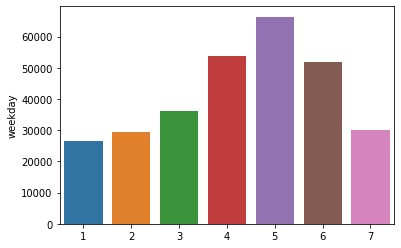

In [17]:
#most transactions took place on Friday
sns.barplot(data["weekday"].value_counts().index,data["weekday"].value_counts())

<AxesSubplot:xlabel='weekday', ylabel='transaction_dollar_amount'>

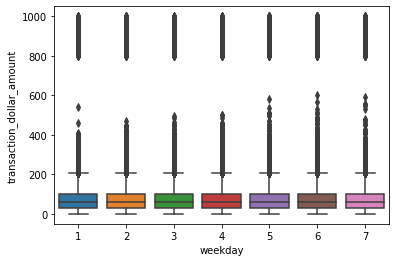

In [18]:
#transaction amount across days, they have similar summary statistics
sns.boxplot(data["weekday"],data["transaction_dollar_amount"])

<AxesSubplot:ylabel='hour'>

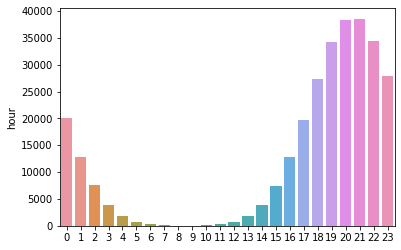

In [19]:
sns.barplot(data["hour"].value_counts().index,data["hour"].value_counts(),order = [str(x) for x in  np.arange(0,24)])

<AxesSubplot:xlabel='hour', ylabel='transaction_dollar_amount'>

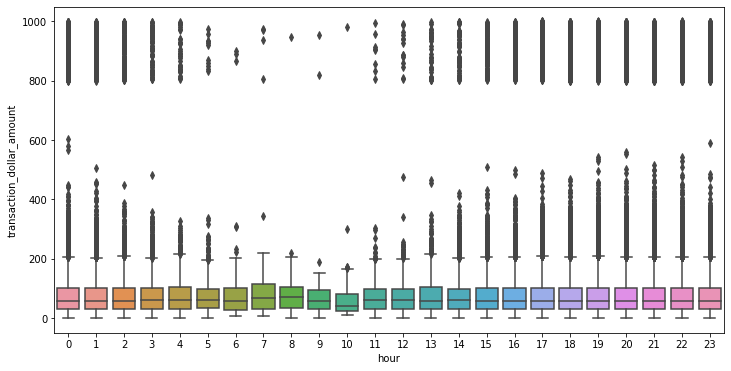

In [20]:
plt.figure(figsize=(12,6))
sns.boxplot(data["hour"],data["transaction_dollar_amount"],order = [str(x) for x in  np.arange(0,24)])

There is a significant amount of transactions occuring during midnight and early hours, it would be interesting to see the user patterns for transactions within those hours, if they represent a diverse group of users, or just few of the users.

In [21]:
unusual_hours = data[data["hour"].apply(lambda x:int(x)<7)]

In [22]:
#974 of 984 users had transactions during 12 to 6 AM
ct = unusual_hours["credit_card"].value_counts()
ct.tail(10)

7805761625362663    1
3598888231646460    1
4168922642514119    1
6447142363937125    1
1808965499397505    1
5449610971108305    1
8450891535792894    1
7546186362815170    1
6400102930973570    1
6756817030435521    1
Name: credit_card, dtype: int64

<AxesSubplot:xlabel='credit_card'>

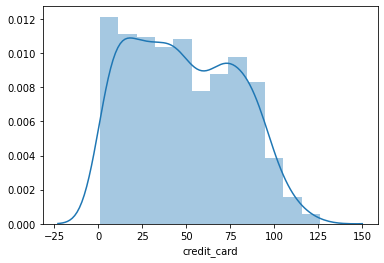

In [23]:
sns.distplot(ct)

### 3. Clustering
- Some features that might indicate the type of activity:
    1. Amount of the transaction, relative to the user's usual spending behavior.
    2. Time of the transaction, specifically, the hour of the transaction.
    3. Location of the transaction, scaled by the common transaction locations of the user.
    4. Monthly credit card limit.

First of all, let's take an example from the unusual dataset, let's take a look at the user with card 3598888231646460]

In [24]:
example = data[data["credit_card"]==3598888231646460]

In [25]:
example.head()

,credit_card,city,state,zipcode,credit_card_limit,date,transaction_dollar_amount,Long,Lat,month,day,weekday,hour
288587,3598888231646460,Jacksonville,VT,5342,4000,2015-08-09 23:31:42,243.46,-72.795701,42.753700,8,9,7,23
288588,3598888231646460,Jacksonville,VT,5342,4000,2015-08-05 15:41:42,37.39,-72.860275,42.826347,8,5,3,15
288589,3598888231646460,Jacksonville,VT,5342,4000,2015-09-14 20:12:08,371.22,-72.885726,42.746496,9,14,1,20
288590,3598888231646460,Jacksonville,VT,5342,4000,2015-10-25 22:36:37,232.11,-72.789219,42.778936,10,25,7,22
288591,3598888231646460,Jacksonville,VT,5342,4000,2015-09-20 20:05:20,306.93,-72.734173,42.794142,9,20,7,20


<AxesSubplot:xlabel='Lat'>

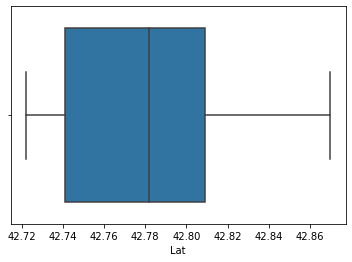

In [26]:
sns.boxplot(example["Lat"]) # a little skewed, so using the median is a better method

<AxesSubplot:xlabel='transaction_dollar_amount'>

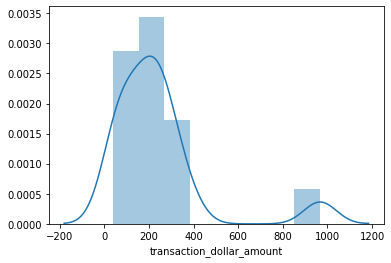

In [27]:
#there is a transaction with a large amount of money involves
sns.distplot(example["transaction_dollar_amount"])

In [28]:
#distance need to be added, calculated from coordinates
#need to have a baseline location, since local coordinates are not provided
#using median of all coordinates associated with the user, since coordinates can be skewed
#also need to scale the transaction amount by median, to detect outliers
coord = data.groupby("credit_card")[['Long', 'Lat']].median().reset_index()
median_amt = data.groupby("credit_card")["transaction_dollar_amount"].median().reset_index()
coord = coord.rename(columns={"Long":"long_median","Lat":"lat_median"})
median_amt = median_amt.rename(columns={"transaction_dollar_amount":"median_amount"})

In [29]:
df = pd.merge(data,coord,on = "credit_card")
df = df.merge(median_amt,on = "credit_card")
df.head()

,credit_card,city,state,zipcode,credit_card_limit,date,transaction_dollar_amount,Long,Lat,month,day,weekday,hour,long_median,lat_median,median_amount
0,1280981422329509,Dallas,PA,18612,6000,2015-08-05 00:59:19,11.94,-75.964527,41.353578,8,5,3,0,-75.971329,41.346369,34.37
1,1280981422329509,Dallas,PA,18612,6000,2015-10-29 18:23:04,5.76,-76.019703,41.311467,10,29,4,18,-75.971329,41.346369,34.37
2,1280981422329509,Dallas,PA,18612,6000,2015-10-25 17:50:48,25.84,-76.043031,41.291053,10,25,7,17,-75.971329,41.346369,34.37
3,1280981422329509,Dallas,PA,18612,6000,2015-09-05 17:39:43,68.89,-75.944299,41.327282,9,5,6,17,-75.971329,41.346369,34.37
4,1280981422329509,Dallas,PA,18612,6000,2015-09-04 14:12:59,27.01,-75.997259,41.352099,9,4,5,14,-75.971329,41.346369,34.37


In [30]:
#add three useful features
#scaled distance from local coordinates, scaled amount by median and variation, scaled amount by credit limit
df.loc[:,"scaled_distance"] = np.sqrt((df["Long"]-df["long_median"])**2 + (df["Lat"]-df["lat_median"])**2)
df.loc[:,"scaled_amount"] = (df["transaction_dollar_amount"]-df["median_amount"])/np.std(df["transaction_dollar_amount"])
df.loc[:,"amt_to_limit"] = df["transaction_dollar_amount"]/df["credit_card_limit"]

In [31]:
df.head()

,credit_card,city,state,zipcode,credit_card_limit,date,transaction_dollar_amount,Long,Lat,month,day,weekday,hour,long_median,lat_median,median_amount,scaled_distance,scaled_amount,amt_to_limit
0,1280981422329509,Dallas,PA,18612,6000,2015-08-05 00:59:19,11.94,-75.964527,41.353578,8,5,3,0,-75.971329,41.346369,34.37,0.009912,-0.179936,0.001990
1,1280981422329509,Dallas,PA,18612,6000,2015-10-29 18:23:04,5.76,-76.019703,41.311467,10,29,4,18,-75.971329,41.346369,34.37,0.059650,-0.229512,0.000960
2,1280981422329509,Dallas,PA,18612,6000,2015-10-25 17:50:48,25.84,-76.043031,41.291053,10,25,7,17,-75.971329,41.346369,34.37,0.090560,-0.068428,0.004307
3,1280981422329509,Dallas,PA,18612,6000,2015-09-05 17:39:43,68.89,-75.944299,41.327282,9,5,6,17,-75.971329,41.346369,34.37,0.033089,0.276923,0.011482
4,1280981422329509,Dallas,PA,18612,6000,2015-09-04 14:12:59,27.01,-75.997259,41.352099,9,4,5,14,-75.971329,41.346369,34.37,0.026556,-0.059043,0.004502


In [33]:
#K-Means Clustering
from sklearn.cluster import KMeans

In [35]:
#X matrix with final set of features
X = df[["weekday","hour","scaled_distance","scaled_amount","amt_to_limit"]]

In [38]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

In [39]:
kmeans.cluster_centers_ #3rd entry is distance

array([[4.23167540e+00, 1.96378887e+01, 6.19755567e-02, 1.34281428e-01,
        6.59605630e-03],
       [4.25391850e+00, 1.66384535e+01, 1.44880387e+02, 1.07790991e-01,
        6.11037660e-03],
       [4.21266968e+00, 1.66036199e+01, 2.13438539e+02, 1.37623259e-01,
        6.45842734e-03],
       [4.60520500e+00, 1.14424253e+00, 6.08478509e-02, 1.42926141e-01,
        6.67345971e-03],
       [4.26993865e+00, 1.64634261e+01, 9.19768088e+01, 1.63339815e-01,
        6.93572139e-03]])

<AxesSubplot:xlabel='hour', ylabel='scaled_distance'>

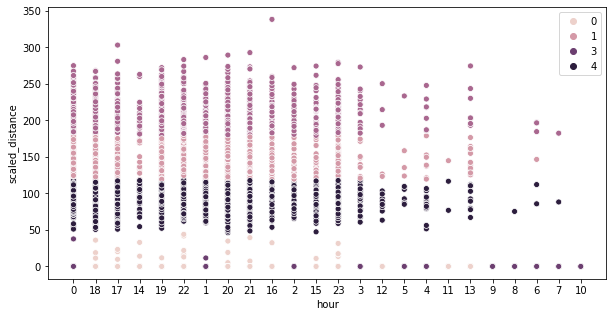

In [44]:
plt.figure(figsize=(10,5))
#plot scatterplot of hour vs distance and color the points by cluster
sns.scatterplot(df["hour"],df["scaled_distance"],hue = kmeans.labels_)

<AxesSubplot:xlabel='scaled_distance', ylabel='scaled_amount'>

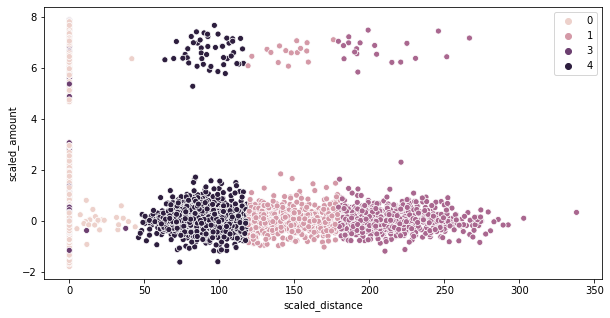

In [46]:
plt.figure(figsize=(10,5))
#plot scatterplot of amount vs distance and color the points by cluster
sns.scatterplot(df["scaled_distance"],df["scaled_amount"],hue = kmeans.labels_)

<AxesSubplot:xlabel='hour', ylabel='scaled_amount'>

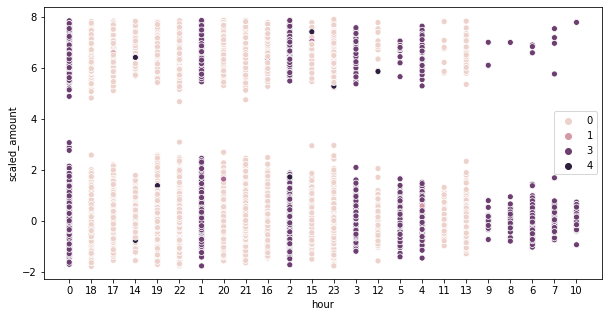

In [48]:
plt.figure(figsize=(10,5))
#plot scatterplot of hour vs amount and color the points by cluster
sns.scatterplot(df["hour"],df["scaled_amount"],hue = kmeans.labels_)

Based on the result of 5 clusters, we can see that the separations based on distance are quite obvious, so distance is a major determinant of which cluster a transaction belows to. Also, based on the last scatterplot, we can see that darker clusters are belonged to unusual hours, which indicate that the time of the transaction is important in determining fraud. But this approach has limitations, further work can include: using silhouette scores to determine which K is the best, and trying dimension reduction methods such as PCA to understand the combinations of features instead of just one feature.